<a href="https://colab.research.google.com/github/cici31/Portfolio/blob/main/data_nakes_gizi_dan_jumlah_penduduk_jawabarat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Memprediksi Jumlah Balita Gizi Buruk berdasarkan Jumlah Penduduk Miskin Jabar per Kabupaten/Kota Tahun 2020



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy.stats import skew,kurtosis,shapiro,f_oneway
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dinkes-od_17184_jml_tenaga_kesehatan_gizi_di_rumah_sakit__jk_data.csv')
data_2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dinkes-od_17107_jumlah_balita_berdasarkan_kategori_balita_gizi_buruk_data.csv')
data_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Jumlah-Penduduk-Miskin (1).csv')

In [ ]:
data_1

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_kelamin,jumlah_nakes_gizi,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAKI-LAKI,7,ORANG,2018
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,PEREMPUAN,33,ORANG,2018
2,3,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAKI-LAKI,27,ORANG,2018
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,PEREMPUAN,50,ORANG,2018
4,5,32,JAWA BARAT,3203,KABUPATEN CIANJUR,LAKI-LAKI,18,ORANG,2018
...,...,...,...,...,...,...,...,...,...
157,158,32,JAWA BARAT,3277,KOTA CIMAHI,PEREMPUAN,26,ORANG,2020
158,159,32,JAWA BARAT,3278,KOTA TASIKMALAYA,LAKI-LAKI,6,ORANG,2020
159,160,32,JAWA BARAT,3278,KOTA TASIKMALAYA,PEREMPUAN,26,ORANG,2020
160,161,32,JAWA BARAT,3279,KOTA BANJAR,LAKI-LAKI,2,ORANG,2020


dengan fungsi .loc saya mengambil data pada tahun 2020 saja karena pada proses analisis ini data terbaru hanya sampai pada tahun 2020 saja

In [ ]:
df=data_1[['nama_kabupaten_kota','jumlah_nakes_gizi']].loc[data_1['tahun']==2020].reset_index()
ddf=df.groupby(by="nama_kabupaten_kota").sum().sort_values('index', ascending=True)
jml_n=ddf.drop(['index'],axis=1)
jml_n.head()

,jumlah_nakes_gizi
nama_kabupaten_kota,
KABUPATEN BOGOR,118
KABUPATEN SUKABUMI,64
KABUPATEN CIANJUR,11
KABUPATEN BANDUNG,36
KABUPATEN GARUT,50


In [ ]:
data_2.isnull().any()

id                     False
kode_provinsi          False
nama_provinsi          False
kode_kabupaten_kota    False
nama_kabupaten_kota    False
kategori_gizi_buruk    False
jumlah_balita           True
satuan                 False
tahun                  False
dtype: bool

Terlihat data_2 terdapat data yang kosong pada kolom jumlah_balita sehingga diperlukan proses handling missing value.

In [ ]:
daf=data_2[['kategori_gizi_buruk','jumlah_balita','tahun']]
daf.loc[daf['tahun']==2020]

,kategori_gizi_buruk,jumlah_balita,tahun
81,BALITA GIZI KURANG,21322.0,2020
82,BALITA PENDEK,NaN,2020
83,BALITA KURUS,NaN,2020
84,BALITA GIZI KURANG,8838.0,2020
85,BALITA PENDEK,NaN,2020
...,...,...,...
157,BALITA PENDEK,NaN,2020
158,BALITA KURUS,NaN,2020
159,BALITA GIZI KURANG,1086.0,2020
160,BALITA PENDEK,NaN,2020


Terlihat hanya data balita gizi buruk saja yang memiliki data, sehingga data balita kurus dan pendek bisa dihilangkan

In [ ]:
df2=data_2.loc[data_2['tahun']==2020].drop(columns=['id','kode_provinsi','nama_provinsi','kode_kabupaten_kota','satuan','tahun']).fillna(0)
aa=df2.loc[df2['kategori_gizi_buruk']=='BALITA GIZI KURANG'].reset_index().sort_values('index', ascending=True)
jml_balita=aa[['nama_kabupaten_kota','jumlah_balita']]
jml_balita

,nama_kabupaten_kota,jumlah_balita
0,KABUPATEN BOGOR,21322.0
1,KABUPATEN SUKABUMI,8838.0
2,KABUPATEN CIANJUR,9069.0
3,KABUPATEN BANDUNG,13728.0
4,KABUPATEN GARUT,9128.0
5,KABUPATEN TASIKMALAYA,9275.0
6,KABUPATEN CIAMIS,4810.0
7,KABUPATEN KUNINGAN,4265.0
8,KABUPATEN CIREBON,15737.0
9,KABUPATEN MAJALENGKA,4549.0


In [ ]:
data_3

,nama_kabupaten_kota,Jumlah_Penduduk_Miskin
0,KABUPATEN BOGOR,465700
1,KABUPATEN SUKABUMI,175100
2,KABUPATEN CIANJUR,234500
3,KABUPATEN BANDUNG,263600
4,KABUPATEN GARUT,262800
5,KABUPATEN TASIKMALAYA,181500
6,KABUPATEN CIAMIS,91400
7,KABUPATEN KUNINGAN,139200
8,KABUPATEN CIREBON,247900
9,KABUPATEN MAJALENGKA,138200


In [ ]:
ds1=pd.merge(jml_n, data_3, how='left', on='nama_kabupaten_kota')
dataset=pd.merge(ds1, jml_balita, how='left', on='nama_kabupaten_kota' )
dataset_baru=dataset.fillna(11.0)
dataset_baru.head()

,nama_kabupaten_kota,jumlah_nakes_gizi,Jumlah_Penduduk_Miskin,jumlah_balita
0,KABUPATEN BOGOR,118,465700.0,21322.0
1,KABUPATEN SUKABUMI,64,175100.0,8838.0
2,KABUPATEN CIANJUR,11,234500.0,9069.0
3,KABUPATEN BANDUNG,36,263600.0,13728.0
4,KABUPATEN GARUT,50,262800.0,9128.0


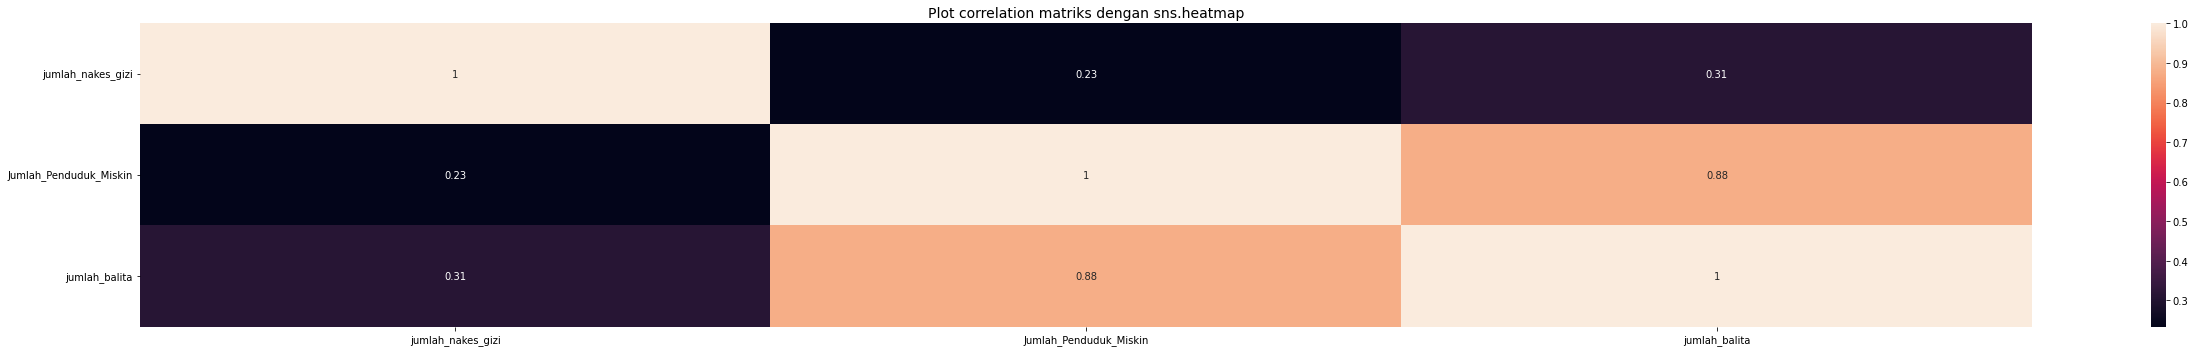

In [ ]:
plt.figure()
sns.heatmap(dataset_baru.corr(), annot=True)
plt.title('Plot correlation matriks dengan sns.heatmap', size=14)
plt.tight_layout()
plt.show()

Dari hasil plot diatas 'jumlah penduduk miskin' dengan 'jumlah balita gizi' buruk ternyata memiliki hubungan yang kuat yaitu sebesar 88% sehingga model dilakukan berdasarkan kriteria tersebut

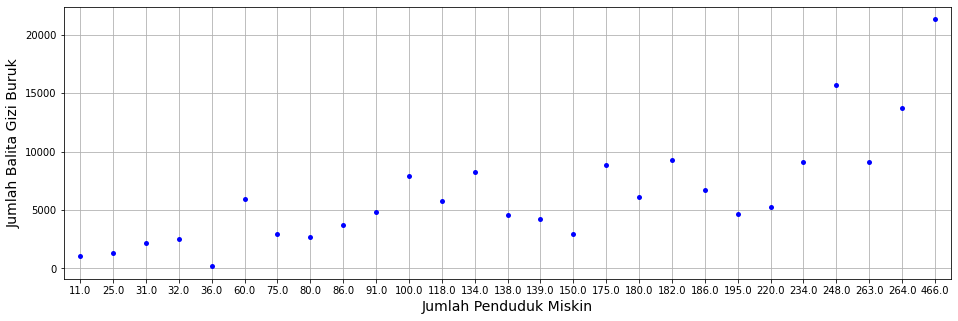

In [ ]:
plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
sns.swarmplot(x='Jumlah_Penduduk_Miskin',y='jumlah_balita', color='blue',data=dataset_baru)
plt.xlabel('Jumlah Penduduk Miskin', size=14)
plt.ylabel('Jumlah Balita Gizi Buruk', size=14)
plt.grid(True)
plt.show()

Selanjutanya saya melakukan uji normalitas untuk mengetahui apakah data terdistribusi normal atau tidak, karena ini berpengaruh pada model yang akan ditentukan nantinya.

In [ ]:
jmll=jml_balita[['jumlah_balita']].to_numpy()
print('Nilai Kurtosis:',kurtosis(jmll,axis=0,bias=True))
print('Nilai skewnees:',skew(jmll,axis=0,bias=True))
print('Nilai Shapiro:',shapiro(jmll))


Nilai Kurtosis: [2.1751475]
Nilai skewnees: [1.43520495]
Nilai Shapiro: (0.8779148459434509, 0.004332072101533413)


In [ ]:
jmlp=jmlp_M[['Jumlah_Penduduk_Miskin']].to_numpy()
print('Nilai Kurtosis:',kurtosis(jmlp,axis=0,bias=True))
print('Nilai skewnees:',skew(jmlp,axis=0,bias=True))
print('Nilai Shapiro:',shapiro(jmlp))

Nilai Kurtosis: [1.97763019]
Nilai skewnees: [1.13590744]
Nilai Shapiro: (0.9130257368087769, 0.026899760589003563)


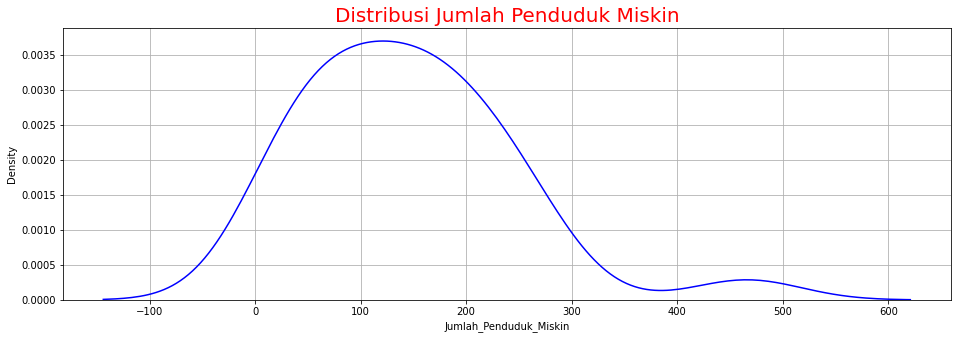

In [ ]:
plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
sns.kdeplot(x='Jumlah_Penduduk_Miskin',color='blue',data=dataset_baru)
plt.title('Distribusi Jumlah Penduduk Miskin', size=20, color='red')
plt.grid(True)
plt.show()

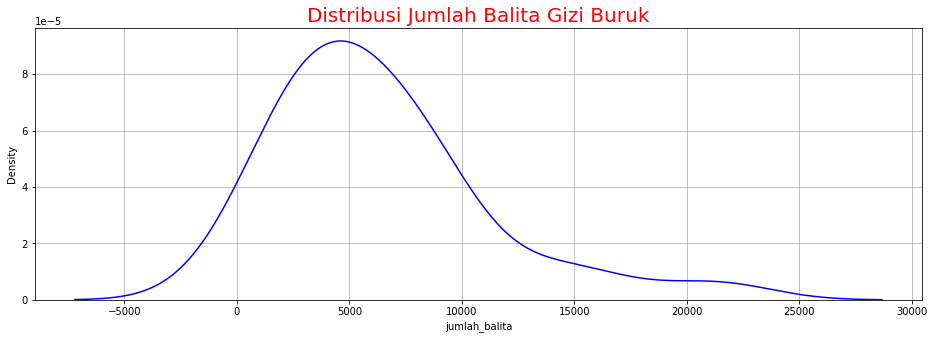

In [ ]:
plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
sns.kdeplot(x='jumlah_balita',color='blue',data=dataset_baru)
plt.title('Distribusi Jumlah Balita Gizi Buruk', size=20, color='red')
plt.grid(True)
plt.show()

Dari hasil analisi di atas ternyata data tidak terdistribusi normal namun bisa dapat dilakukan transformasi, dari hasil plot terlihat distribusi moderate positive skewnes, sehingga dapat dengan fungsi sqrt() agar data terdistribusi normal

In [ ]:
def tfakar(x):
  for akar in x:
    hitung=math.sqrt(akar)
    print(float(hitung))
  return

In [ ]:
tfakar(jmll)

146.0205464994567
94.01063769595439
95.23129737644027
117.16654812701448
95.5405672999695
96.30680142129111
69.35416353759881
65.30696746902278
125.44720004846661
67.446274915669
76.05261336732617
72.2357252334328
54.56189146281496
51.45872132107443
68.16890786861705
81.99390221229869
78.29431652425353
12.68857754044952
53.99073994677235
36.51027252705737
88.93818077743664
46.357307945997036
90.70832376358854
77.12327793863537
49.90991885387112
61.13918547053109
32.95451410656816


In [ ]:
tfjmll=[146.0205464994567,
94.01063769595439,
95.23129737644027,
117.16654812701448,
95.5405672999695,
96.30680142129111,
69.35416353759881,
65.30696746902278,
125.44720004846661,
67.446274915669,
76.05261336732617,
72.2357252334328,
54.56189146281496,
51.45872132107443,
68.16890786861705,
81.99390221229869,
78.29431652425353,
12.68857754044952,
53.99073994677235,
36.51027252705737,
88.93818077743664,
46.357307945997036,
90.70832376358854,
77.12327793863537,
49.90991885387112,
61.13918547053109,
32.95451410656816]

In [ ]:
tfakar(jmlp)

21.587033144922902
13.228756555322953
15.297058540778355
16.24807680927192
16.217274740226856
13.490737563232042
9.539392014169456
11.789826122551595
15.748015748023622
11.74734012447073
10.862780491200215
14.832396974191326
12.24744871391589
8.94427190999916
13.96424004376894
13.638181696985855
13.416407864998739
6.0
8.660254037844387
5.0
10.0
5.5677643628300215
11.575836902790225
7.745966692414834
5.656854249492381
9.273618495495704
3.3166247903554


In [ ]:
tfjmlp=[21.587033144922902,
13.228756555322953,
15.297058540778355,
16.24807680927192,
16.217274740226856,
13.490737563232042,
9.539392014169456,
11.789826122551595,
15.748015748023622,
11.74734012447073,
10.862780491200215,
14.832396974191326,
12.24744871391589,
8.94427190999916,
13.96424004376894,
13.638181696985855,
13.416407864998739,
6.0,
8.660254037844387,
5.0,
10.0,
5.5677643628300215,
11.575836902790225,
7.745966692414834,
5.656854249492381,
9.273618495495704,
3.3166247903554]

Setelah dilakukan transformasi selanjutnya melakukan uji normalitas kembali

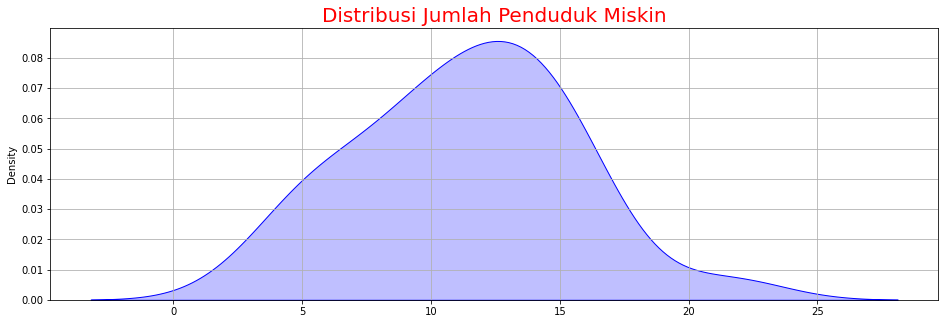

In [ ]:
plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
sns.kdeplot(x=tfjmlp,  color='blue', shade=True)
plt.title('Distribusi Jumlah Penduduk Miskin', size=20, color='red')
plt.grid(True)
plt.show()

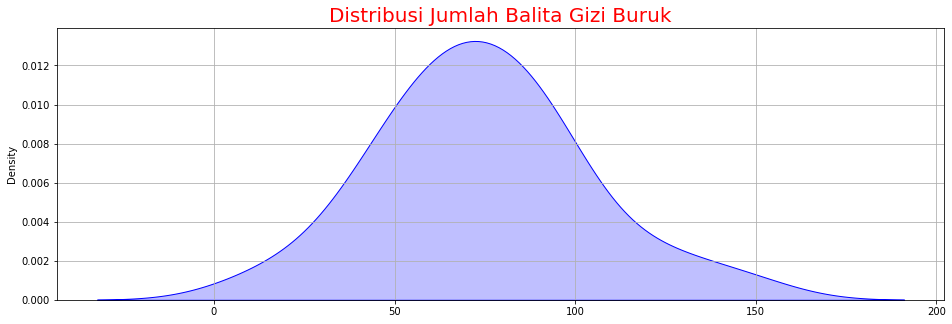

In [ ]:
plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
sns.kdeplot(x=tfjmll,  color='blue', shade=True)
plt.title('Distribusi Jumlah Balita Gizi Buruk', size=20, color='red')
plt.grid(True)
plt.show()

In [ ]:
print('Nilai distribusi jumlah penduduk miskin')
print('Nilai Kurtosis:',kurtosis(tfjmlp,axis=0,bias=True))
print('Nilai skewnees:',skew(tfjmlp,axis=0,bias=True))
print('Nilai Shapiro:',shapiro(tfjmlp))

Nilai distribusi jumlah penduduk miskin
Nilai Kurtosis: -0.18230005596706356
Nilai skewnees: 0.10051884656544904
Nilai Shapiro: (0.977354884147644, 0.7983607053756714)


In [ ]:
print('Nilai distribusi jumlah balita')
print('Nilai Kurtosis:',kurtosis(tfjmll,axis=0,bias=True))
print('Nilai skewnees:',skew(tfjmll,axis=0,bias=True))
print('Nilai Shapiro:',shapiro(tfjmll))

Nilai distribusi jumlah balita
Nilai Kurtosis: 0.2893522058181399
Nilai skewnees: 0.3248540911883762
Nilai Shapiro: (0.9829116463661194, 0.9213371276855469)


Hasilnya ternyata terdistribusi normal untuk kedua data, sehingga saya mencoba untuk melakukan model linear regresi sederhana

In [ ]:
X = np.array(tfjmlp)
y = np.array(tfjmll)
X = X.reshape(-1,1)
y

array([146.0205465 ,  94.0106377 ,  95.23129738, 117.16654813,
        95.5405673 ,  96.30680142,  69.35416354,  65.30696747,
       125.44720005,  67.44627492,  76.05261337,  72.23572523,
        54.56189146,  51.45872132,  68.16890787,  81.99390221,
        78.29431652,  12.68857754,  53.99073995,  36.51027253,
        88.93818078,  46.35730795,  90.70832376,  77.12327794,
        49.90991885,  61.13918547,  32.95451411])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
modfit=model.fit(X,y)

print('Nilai Slope:', modfit.coef_)
print('Nilai intercept:',modfit.intercept_)
print('Hasil Anova:',f_oneway(tfjmll,tfjmlp))
# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))


Nilai Slope: [5.95113552]
Nilai intercept: 6.899008401643485
Hasil Anova: F_onewayResult(statistic=124.19787138632763, pvalue=2.160512288940632e-15)
Training Accuracy : 0.8191879072337898
Testing Accuracy : 0.4714269458920941


Dari hasil di atas nilai Slope dan Intercept digunakan sebagai persamaan linear regresi, pada hasil Anova ternyata nilai pvalue > 0.05 hal ini indikasi sebagai model kurang baik, terlihat dari hasil Testing Accuracy sebesar 47%

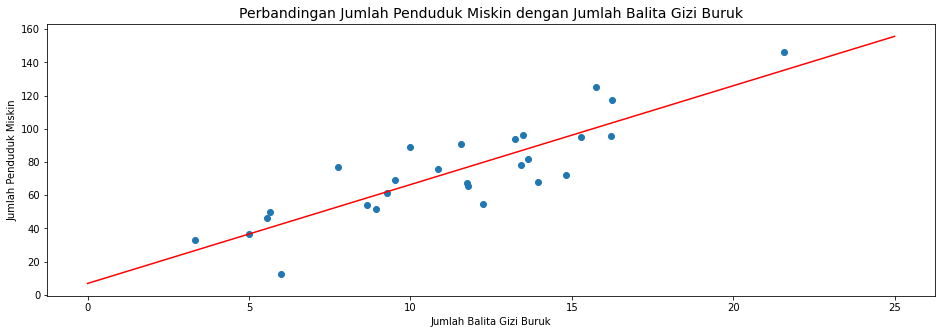

In [ ]:
X_vis = np.array([0,25]).reshape(-1,1)
y_vis = modfit.predict(X_vis)

plt.rcParams['figure.figsize'] = (35,5)
plt.subplot(1, 2, 1)
plt.scatter(X,y)
plt.plot(X_vis, y_vis, '-r')
plt.title('Perbandingan Jumlah Penduduk Miskin dengan Jumlah Balita Gizi Buruk', size=14)
plt.xlabel('Jumlah Balita Gizi Buruk')
plt.ylabel('Jumlah Penduduk Miskin')
plt.show()

In [ ]:
intercept = modfit.intercept_
slope = modfit.coef_
def myfunc(x):
  return slope * x + intercept
myfunc(21.58703314)


array([135.36636811])

Kesimpulan
Terdapat hubungan yang kuat antara data jumlah penduduk miskin dan jumlah balita gizi buruk sebesar 88%, dan data sebenarnya sudah memenuhi syarat linearitas namun model linear regresi sederhana dirasa kurang cukup efektif terhadap hasil prediksi dan berakibat nilai error yang besar.

Sehingga perlu adanya uji model yang lain agar mendapatkan hasil yang efektif 